In [105]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.discriminant_analysis import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('../1146.csv',index_col=0)



In [106]:
data.head()

,0,1,2,3,4,5,6,7
ID,,,,,,,,
0,7.670533,-8.361275,-4.382564,9.554443,-1.694103,-10.321502,-3.487037,4.396732
1,6.637839,11.816383,9.915178,-0.405736,-7.225997,6.356163,8.853543,-7.518973
2,-9.647596,-10.778571,10.732021,5.710078,-0.840306,0.988635,1.728992,-6.666212
3,3.912661,-8.657159,-4.019281,8.890826,-1.637873,-5.524985,-3.793121,2.372040
4,-7.482907,-10.025526,4.898986,2.455718,0.130918,-2.226422,6.583667,-10.293174


In [109]:
# Scale the data
scaler = StandardScaler()
data = scaler.fit_transform(data)
df = pd.DataFrame(data, columns = ['x0','x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])



In [114]:
data


array([[ 1.63383532, -0.99520849, -0.86854676, ..., -1.88201914,
        -0.62065156,  1.25222166],
       [ 1.44023131,  2.01958206,  1.43873319, ...,  1.30638986,
         1.08307902, -1.16375761],
       [-1.61287357, -1.35638238,  1.5705502 , ...,  0.28023465,
         0.09946921, -0.99085527],
       ...,
       [ 0.54885133, -0.8061811 , -1.29383278, ..., -1.43423119,
        -0.67684812,  1.52358363],
       [ 1.35176648,  1.35194977,  1.38659695, ...,  1.06921993,
         0.51529252, -0.59941145],
       [-0.74844461,  0.76801337, -0.35548093, ...,  1.41493251,
        -1.54247392,  0.06613386]])

In [128]:
# Create a MeanShift model
bandwidth = 3
ms = MeanShift(bandwidth=bandwidth)
ms.fit(data)
labels = ms.labels_



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7e257e7af0>
Traceback (most recent call last):
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x0', ylabel='x1'>

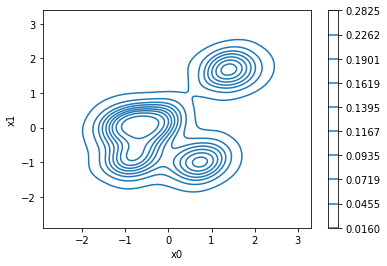

In [129]:
sns.kdeplot('x0','x1',data=df,cbar=True)

In [130]:
labels

array([0, 1, 0, ..., 0, 1, 0])

In [131]:
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2


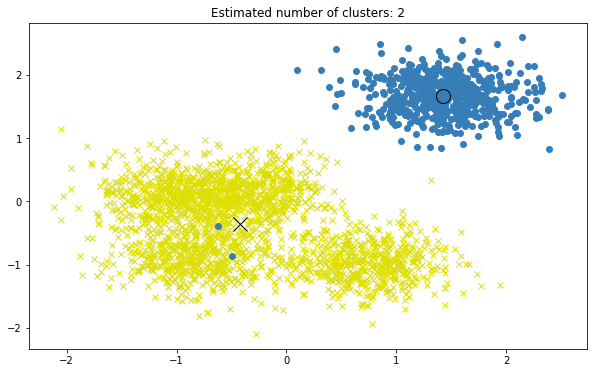

In [132]:
# Plotando o scatter plot dos dados originais e dos clusters encontrados
plt.figure(figsize=(10, 6))

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(data[my_members, 0], data[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [133]:
cluster_counts = np.bincount(labels)
# Imprimir a quantidade de elementos em cada cluster
for cluster_num, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_num}: {count} elementos")


Cluster 0: 2207 elementos
Cluster 1: 554 elementos


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7e2540e550>
Traceback (most recent call last):
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


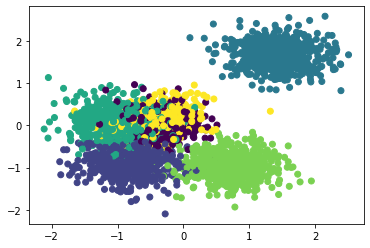

In [142]:
#importar GussianMixture
from sklearn.mixture import GaussianMixture
gs = GaussianMixture(n_components=6,random_state=123)
gs.fit(data)
#labels2 = gs.labels_
y_pred = gs.predict(data)
plt.scatter(data[:,0],data[:,1],c=y_pred)
plt.show()

In [143]:
cluster_counts = np.bincount(y_pred)
# Imprimir a quantidade de elementos em cada cluster
for cluster_num, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_num}: {count} elementos")

Cluster 0: 247 elementos
Cluster 1: 552 elementos
Cluster 2: 552 elementos
Cluster 3: 552 elementos
Cluster 4: 553 elementos
Cluster 5: 305 elementos
